# Práctica 3.1: Regresión lineal

<center><h3>
    David Pacios Vázquez
</h3></center>

## Instrucións

Isto é un **Jupyter Notebook**, un documento que integra código Python nun arquivo Markdown.
Isto permítenos, ir exexutando celdas de código pouco a pouco, así como xerar automáticamente un informe ben formateado da práctica.

Podes engadir unha celda co botón **"Insert"** da barra de ferramentas, e cambiar seu tipo con **"Cell > Cell Type"**

Para executar unha celda de código, seleccionarémola e pulsaremos a botón **"▶ Run"** da barra de ferramentas.
Para pasar o documento a HTML, seleccionaremos **"File > Download as > HTML (.html)"**

Segue este guión ata o final. Executa o código proporcionado paso a paso comprendendo o que estás a facer e reflexionando sobre os resultados. Haberá preguntas intercaladas ao longo do guión, responde a todas elas na sección reservada para ese fin: **"Respostas ao cuestionario"**. Por favor, non modifiques ningunha liña de código agás cando se che pida explícitamente.

Non esquezas insertar o teu **nome e apelidos** na celda superior.

## Entrega da práctica

A data límite de entrega será a indicada no Campus Virtual. A entrega consistirá nun único arquivo comprimido co nome `APELIDOS_NOME_RegresionLineal.zip` que conteña os seguintes ficheiros:

 * `APELIDOS_NOME_RegresionLineal.html`: Arquivo HTML froito da exportación do presente Notebook, coas preguntas respondidas ao final do documento.
 * `APELIDOS_NOME_RegresionLineal.ipynb`: Arquivo Jupyter Notebook fonte.
 * Arquivo de datos do problema de libre elección.

## Números aleatorios

<span style="color:red">**MOI IMPORTANTE:**</span> Vamos a establecer un *seed* cun valor predefinido inmediatamente antes de executar calquera operación cun compoñente aleatorio. Así nos aseguraremos de que os nosos resultados sexan repetibles.

Isto é, imos poñer `np.random.seed(SEED_VALUE)` antes de:
 - `train_test_split()`
 - `fit()`
 - `predict()`
 
Tamén imos poñer `random_state=SEED_VALUE` en aquelas funcións que o admitan (coma `train_test_split`).

Haberá ocasión nas que isto sexa excesivo, pero así curámonos en despistes.

# Estimación do prezo das vivendas

Neste exercicio imos asentar os conceptos vistos nas clases teóricas relativos á técnica de regresión lineal a través dun problema sinxelo. Supoñamos que somos unha inmobiliaria e queremos desenvolver unha ferramenta que nos axude a estimar un prezo recomendado de venda dos nosos inmobles. Dispomos dun pequeno dataset, `vivendas.csv`, que recolle datos de 73 vivendas vendidas pola empresa nos dous últimos anos. Neste conxunto de datos temos rexistrada a superficie total do inmoble en metros cadrados, xunto co prezo de venda en miles de euros. O noso obxectivo final é sermos capaces de, para cada novo inmoble á venda, obter un prezo recomendado de venda en base aos metros cadrados dos que dispón.

## Carga de datos e comprensión dos mesmos

Comezaremos por cargar en Python o noso conxunto de datos. O primeiro que debemos facer é asegurarnos de ter o arquivo de datos no mesmo directorio que este guión de prácticas. 

Para a carga dos datos empregamos a función `read_csv()` indicando o nome do arquivo CSV. Tamén detallamos que a primeira liña do arquivo contén os nomes das columnas (`header = 0`) e que os datos están separados por comas (`delimiter = ','`). Executa o seguinte script premendo no botón **"▶ Run"** da barra de ferramentas:

In [63]:
import pandas as pd  # Importamos a librería (isto sólo é necesario facelo unha vez)

vivendas = pd.read_csv('vivendas.csv',  # Cargamos o csv
                       delimiter=',',
                       header=0)

O dataset xa se atopa dispoñible no entorno Python. Agora poderémolo referenciar por medio do obxecto `vivendas`, do tipo `DataFrame`. Os dataframes son unha clase de obxectos especial en Python, usados como a estrutura de datos fundamental pola maioría do software de construción de modelos deste entorno. Un dataframe almacea unha táboa de datos na que cada fila corresponde a unha instancia (no noso caso vivendas) e cada columna a unha variable (superficie e prezo).

Unha boa práctica antes de comezar a construir un modelo de regresión é analizar e comprender os datos cos que imos a traballar. O primeiro que faremos, porén, será obter unha breve descripción dos mesmos:

* Número de instancias.
* Número de variables.
* Tipo de cada variable.
* Distribución de valores por cada variable.
* Correlación entre variables.

A función `.info()` do obxecto `DataFrame` danos unha primeira descrición dos datos bastante completa:

In [64]:
vivendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   superficie  73 non-null     int64  
 1   prezo       73 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.3 KB


Vemos unha descrición por columnas, indicándonos o tipo de dato de cada columna e cantos valores hai para cada unha delas. Hai outras alternativas á función anterior. Por exemplo, `.head()` tamén nos mostra as primeiras *n* instancias do noso conxunto de datos:

In [65]:
vivendas.head(n=5)

,superficie,prezo
0,81,191.73
1,117,286.90
2,99,248.93
3,85,143.29
4,116,249.61


Con `.shape` coñecemos directamente o número de filas e columnas do dataset: 

In [66]:
vivendas.shape

(73, 2)

In [67]:
print('Filas: {}'.format(vivendas.shape[0]))
print('Columnas: {}'.format(vivendas.shape[1]))

Filas: 73
Columnas: 2


Un consello útil para o futuro: cando teñas dúbidas sobre que fai ou que argumentos toma unha función, non dubides en consultar a axuda de Python con `help()`. Por exemplo:

In [68]:
help(vivendas.head)

Help on method head in module pandas.core.generic:

head(n: 'int' = 5) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon

> ❓ **_Pregunta 1._**  Indica o número de instancias e variables do dataset e o seu tipo. Investiga como acceder a valores de filas e columnas concretas dun obxecto dataframe e averigua cal foi o prezo de venda da vivenda na posición 50 do dataset. Indica o comando que empregaches para averigualo.

In [69]:
vivendas['prezo'][50]

376.51

El número de instancias es 73

El número de variables por cada instancia es 2: Una para la superficie en m^2 y otra para el precio de la vivienda. 

``` python
vivendas['prezo'][50]
#El precio es 376.510,00€ 
```

Tamén podemos analizar a distribución dos datos coa función `.describe()`:

> ❓ **_Pregunta 2._**  Cal é o prezo medio de venda dos inmobles? Que indican e significan *25%.*, *50%.* e *75%.* na saída da función anterior? Baseándote nos valores anteriores, cal é a mediana de superficie e a de precio?

In [70]:
vivendas.describe()

,superficie,prezo
count,73.000000,73.000000
mean,127.534247,162.652192
std,52.721512,108.200288
min,75.000000,51.250000
25%,91.000000,89.520000
50%,109.000000,119.730000
75%,138.000000,191.730000
max,281.000000,507.090000


EL precio medio de las viviendas es de 162.652,12€

El 25%, 50% y 75% corresponde a el primer, segundo y tercer quantil, es decir justo el precio del inmueble situado en la posición correspondinte al 25%, 50% y 75%.

La mediana corresponder con el dato o la pareja de datos situada en el 50% de los datos. Por lo tanto, coincide con el segundo quantil.

> ❓ **_Pregunta 3._**  Observa detidamente o gráfico anterior. Xa que se trata dun gráfico de dispersión, que poderías comentar sobre a dispersión dos datos? Dirías que existe algún tipo de relación entre as dúas variables? Xustifica a túa resposta.

<IPython.core.display.Javascript object>


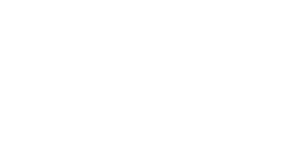

<AxesSubplot:xlabel='superficie', ylabel='prezo'>

In [71]:
vivendas.plot(kind='scatter', x='superficie', y='prezo')

Coa función `.plot()` podemos debuxar rapidamente un *scatter plot*, ou gráfico de dispersión, dos nosos datos:

La dispersión aumenta cuanto más aumenta la superficie de la vivienda, teniendo datos muy concentrados con pequeñas superficies y datos más disperos cuando tenemos mayores superficies, excepto por valores atipicos.

La relación entre las variables precio y superficie es que al aumentar una, directamente, aumenta la otra.

Os gráficos de dispersión axúdannos a visualizar relacións lineais entre a variable a predicir e as variables preditoras. Neste caso queremos predicir o prezo do inmoble e a única variable preditora da que dispomos é a súa superficie pero, se dispuxésemos de varias variables preditoras, deberiamos debuxar un gráfico de dispersión para cada unha delas ou un gráfico en 3 dimensións no caso de que sexan 2 variables preditoras.

Para representacións deste tipo, é conveniente empregar a librería `matplotlib`.

In [72]:
# Indicámoslle ao Notebook que queremos figuras interactivas (isto sólo é necesario facelo unha vez)
# Isto é interesante para representacións en 3D
%matplotlib notebook

import matplotlib.pyplot as plt  # Importamos a libraría (isto sólo é necesario facelo unha vez)
import numpy as np  # Importamos NumPy, para operacións matemáticas

x  = [0.         0.04081633 0.08163265 0.12244898 0.16326531]...
y1 = [1.         0.96729486 0.8713187  0.71834935 0.51839257]...
y2 = [-1.         -0.99179001 -0.96729486 -0.92691676 -0.8713187 ]...


<IPython.core.display.Javascript object>


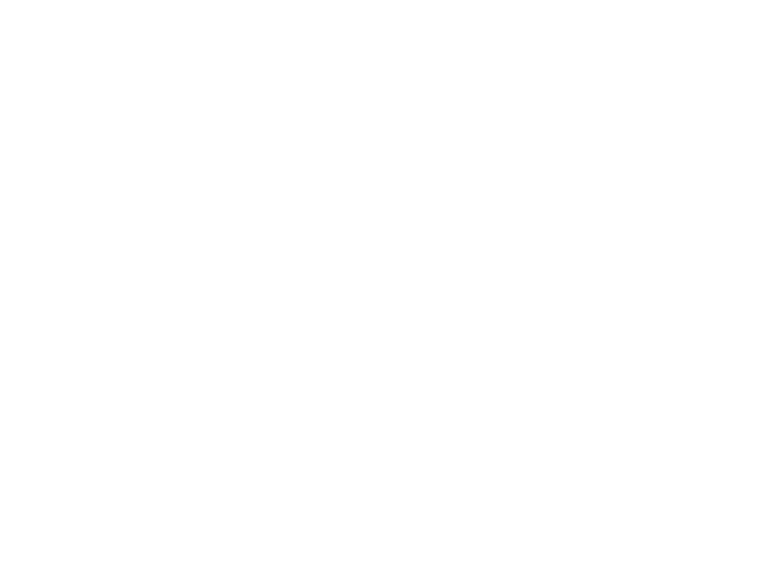

In [73]:
# Simulamos uns datos
x = np.linspace(0.0, 2.0)
y1 = np.cos(2 * np.pi * x)
y2 = np.cos(np.pi + np.pi * x)

print('x  = {}...'.format(x[:5]))
print('y1 = {}...'.format(y1[:5]))
print('y2 = {}...'.format(y2[:5]))


# Debuxamos os datos
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)

ax.scatter(x, y1, color="red")  # Engadimos un scatterplot vermello
ax.scatter(x, y2, color="blue")  # Engadimos un scatterplot azul

ax.set_title("Proba")  # Poñemos un título

plt.xlabel("Eixo X")  # Nombramos os eixos
plt.ylabel("Eixo Y")

plt.show()  # Mostramos a figura por pantalla

Analizando o gráfico de dispersión das vivendas xa nos puidemos facer unha idea da dependencia entre as dúas variables. Outro xeito de analizar esta dependencia é estudando a súa correlación. A correlación é unha medida estatística que amosa o grao de dependencia lineal entre dúas variables. Esta medida pode tomar valores no rango [-1, +1]:

* Se o valor dunha das variables medra de xeito constante conforme aumenta o valor da outra, entón dicimos que teñen unha forte correlación positiva (valores próximos a +1).
* Se o valor dunha das variables diminúe de xeito constante cando o valor da outra aumenta, entón teñen unha forte correlación negativa (valores próximos a -1).
* Se as dúas variables están pouco relacionadas entón obtemos valores próximos a 0.

En Python podemos obter o coeficiente de correlación empregando a función `.corr()` dunha columna do dataframe sobre a outra columna:

In [74]:
vivendas['superficie'].corr(vivendas['prezo'])

0.8337718450638245

Observa como accedemos a cada unha das columnas do dataframe. 

Se traballásemos con máis de 2 variables resultaría máis doado invocar a función `.corr()` directamente sobre o dataframe, para obter unha matriz de correlacións entre cada par de variables:

In [75]:
vivendas.corr()

,superficie,prezo
superficie,1.000000,0.833772
prezo,0.833772,1.000000


## Construción dun modelo de regresión a baixo nivel

Imos construir un regresor lineal empregando o método de descenso do gradiente que xa vimos nas clases expositivas. Neste caso imos empregar as dúas variables das que dispomos directamente, pero ten en conta que habitualmente antes de adestrar un modelo realízase unha etapa de preprocesado na que, entre outras cousas, seleccionamos as instancias e as variables que queremos empregar na aprendizaxe. 

Queremos obter unha función lineal $h_\theta (x)$ (unha recta) que, a partir dos valores de superficie das vivendas, $x$, nos prediga o seu prezo máis axeitado, $y$:
  $$ y = h_\theta (x) = \theta_0 + \theta_1 x, $$
onde $\theta_0$ e $\theta_1$ son os 2 parámetros que definen a recta.

Definimos a función $h_\theta (x)$ en Python:

In [76]:
### Función de regresión lineal h ###
def h(x, th0, th1):
    return (th0 + x * th1)

Con esta función $h_\theta (x)$, se conñecésemos os valores óptimos dos dous parámetros $\theta_0$ e $\theta_1$ da recta, seriamos capaces de predecir un prezo aproximado ($y$) en base a unha superficie dada ($x$). Por exemplo, imaxina que  $\theta_0 = 0.5$ e $\theta_1 = 3$ son os valores óptimos da recta. Se temos unha vivenda de 242 metros cadrados (vivenda 24 no dataset), podemos estimar o seu prezo así:

In [77]:
h(x=242, th0=0.5, th1=3)

726.5

O prezo estimado para unha vivenda de 242 metros cadrados sería de 726500 euros. Sen embargo, o prezo real desta vivenda é:

In [78]:
vivendas.iloc[23]

superficie    242.0
prezo         475.4
Name: 23, dtype: float64

A estimación supera en 251100 euros o prezo real do inmoble.

O problema é por tanto que non coñecemos cales son os valores reais dos parámetros, necesitamos aprendelos. Para iso, definimos unha función de custo $J(\theta_0, \theta_1)$ que guíe ao algoritmo de aprendizaxe no axuste de $\theta_0$ e $\theta_1$. Empregamos o erro cadrático medio:

In [79]:
### Erro cadrático medio ###
def ecm(reais, predicion):
    m = len(reais)  # tamaño do conxunto de datos
    erro = sum((predicion - reais)**2) / (2*m)
    return erro

### Función de custo J ###
def j(x, y, th0, th1):
    pred = h(x, th0, th1)  # predición realizada co noso regresor lineal h
    erro = ecm (y, pred)
    return erro

Por último, creamos unha función que implemente o descenso do gradiente, método que nos permitirá axustar a recta que mellor aproxima a nube de puntos:

In [80]:
### Implementación do método do descenso do gradiente ###
def desc_grad(x, y, alpha=0.00001, iteracions=35):
    # Inicializamos os coeficientes a 0
    theta0 = 0
    theta1 = 0
    hist_custos = []
    
    for i in range(iteracions):
        # Calculamos o erro cometido coa función de custo
        custo = j(x, y, theta0, theta1)
        hist_custos.append(custo)
        
        ## Actualizamos os valores dos coeficientes theta0 e theta1 
        pred = h(x, theta0, theta1)  # predición realizada co noso regresor lineal h
        m = len(x)                # tamaño do conxunto de datos
        theta0 = theta0 - alpha * sum(pred-y) / m
        theta1 = theta1 - alpha * sum((pred-y) * x) / m
        
        
        # Graficamos a iteración
        if i%2 == 0 or i == iteracions:  # Graficamos de 2 en 2 pasos
            fig = plt.figure(figsize=(20, 5))
            ax1 = fig.add_subplot(121, projection='rectilinear')
            ax2 = fig.add_subplot(122, projection='rectilinear')

            ax1.scatter(x, y, color="red")
            line_x_vals = np.array(ax1.get_xlim())
            line_y_vals = theta0 + theta1 * line_x_vals
            ax1.plot(line_x_vals, line_y_vals, '--')
            ax1.set_title("Iteración {}:     y = {} + {} * x".format(i, theta0, theta1))
            ax1.set_xlabel("prezo")
            ax1.set_ylabel("superficie")

            ax2.plot(range(i+1), hist_custos, '--', color="green")
            ax2.set_title("Custo: {}".format(custo))
            ax2.set_xlabel("iteración")
            ax2.set_ylabel("custo")

            plt.show()

Agora, simplemente chamamos á función anterior pasándolle como datos a superficie e prezo das vivendas:

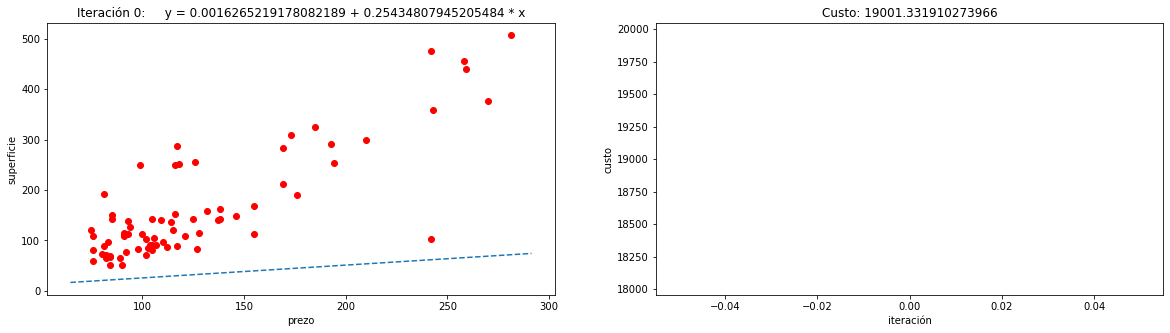

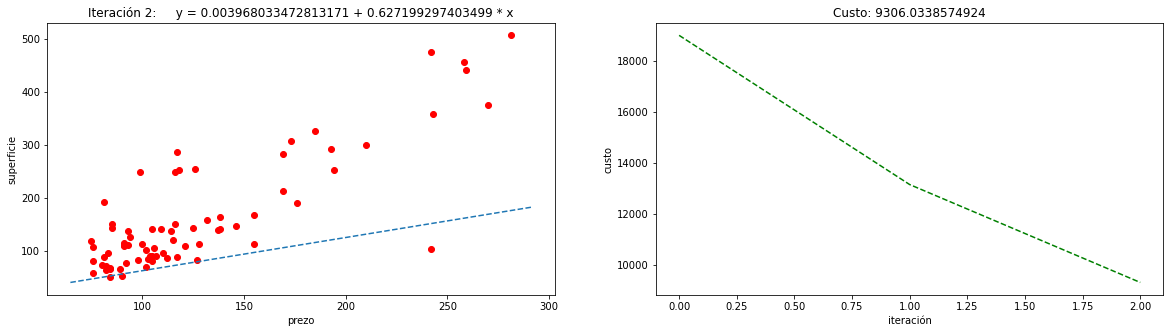

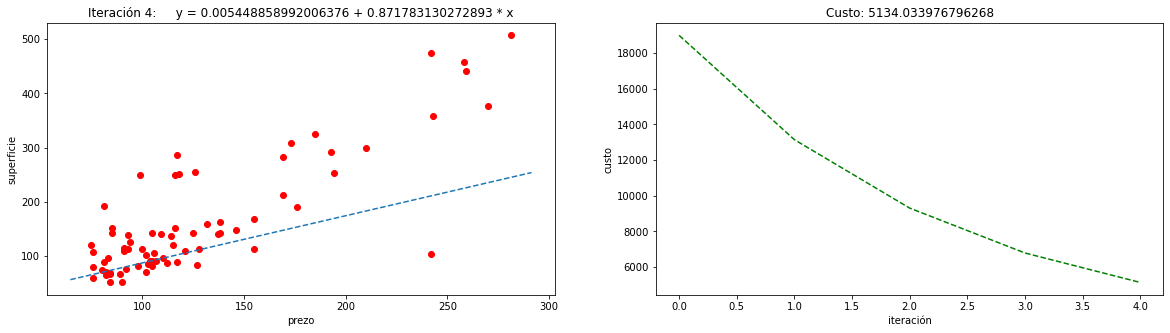

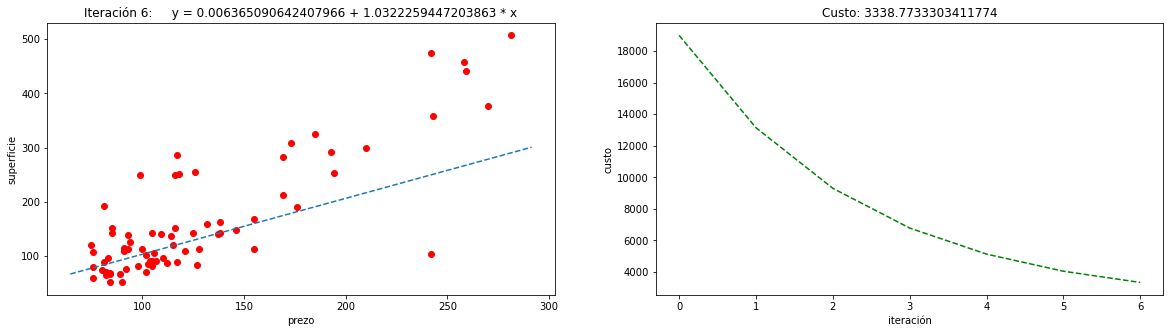

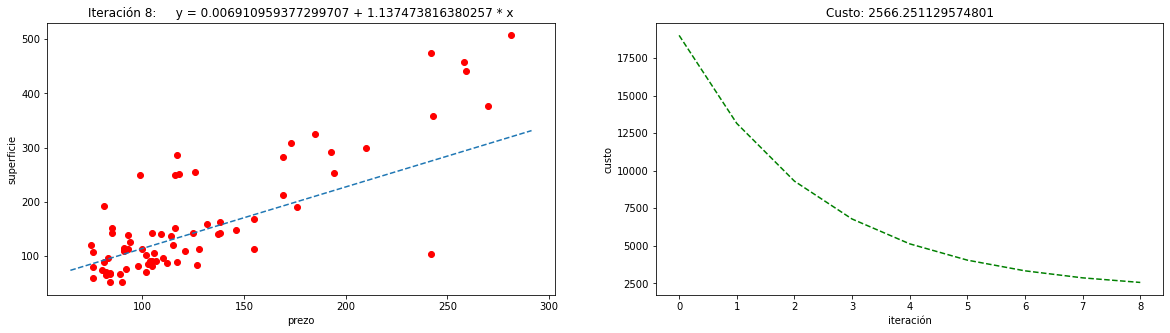

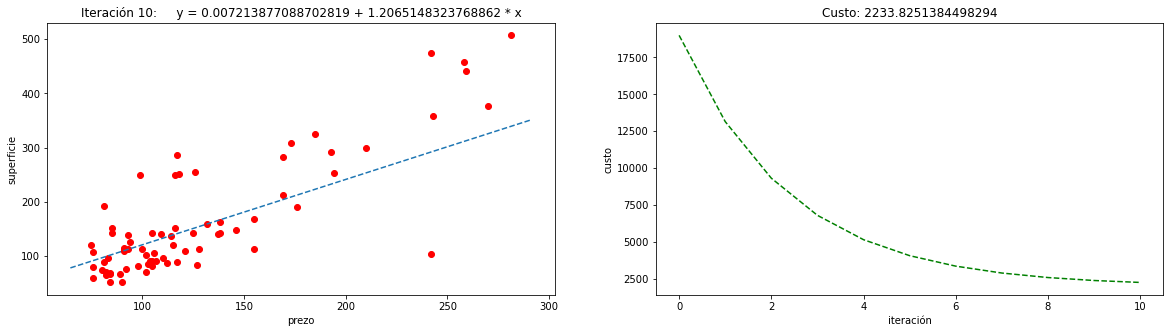

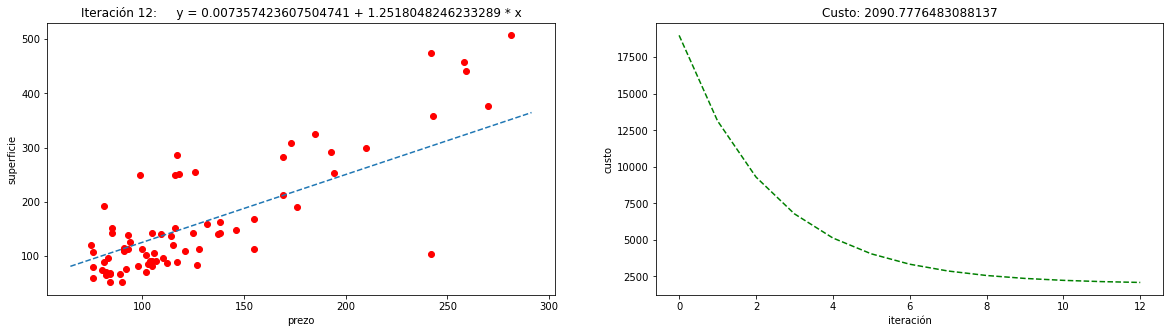

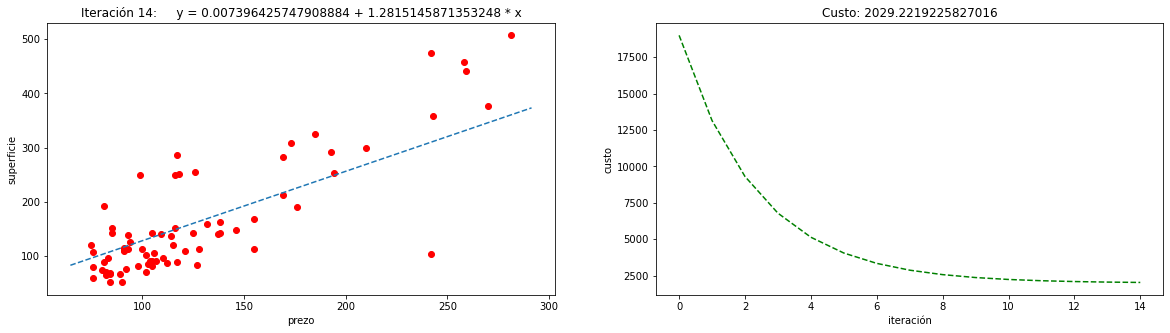

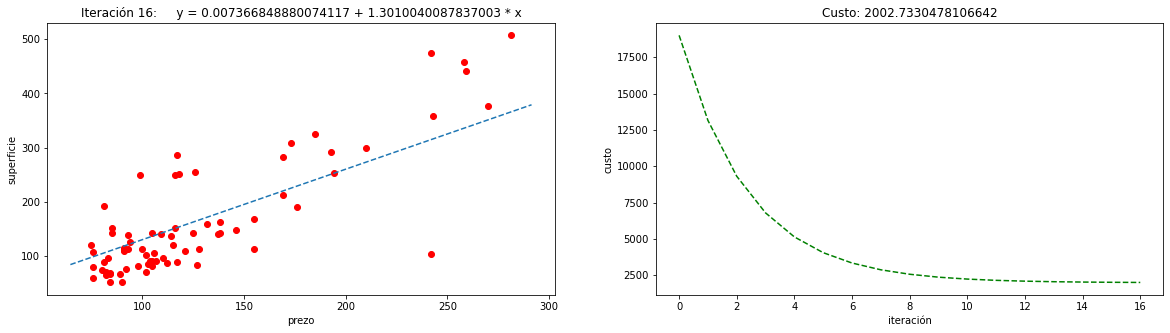

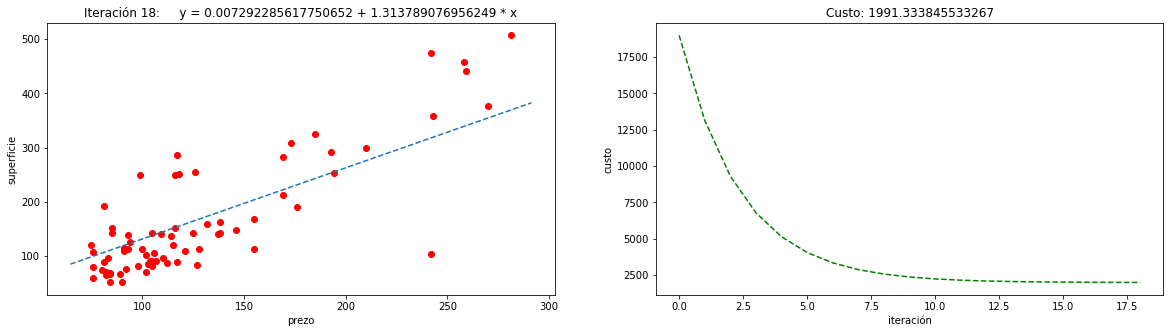

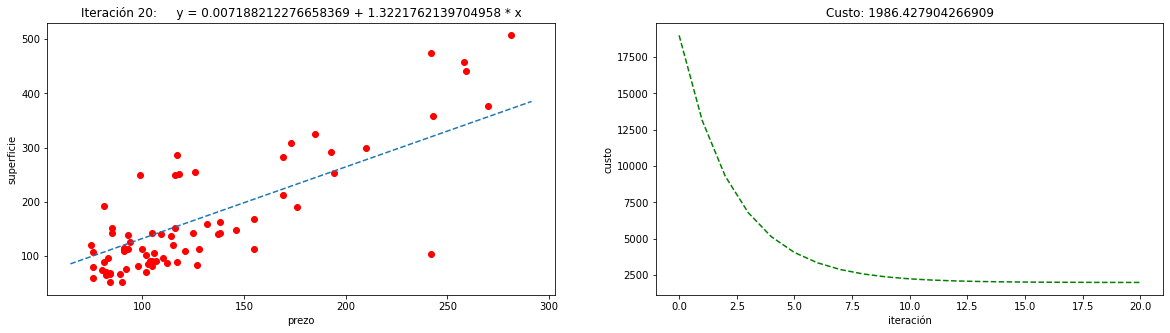

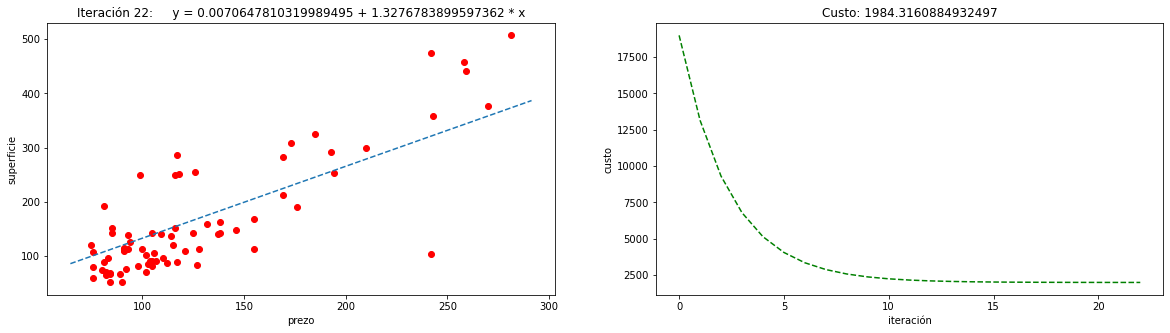

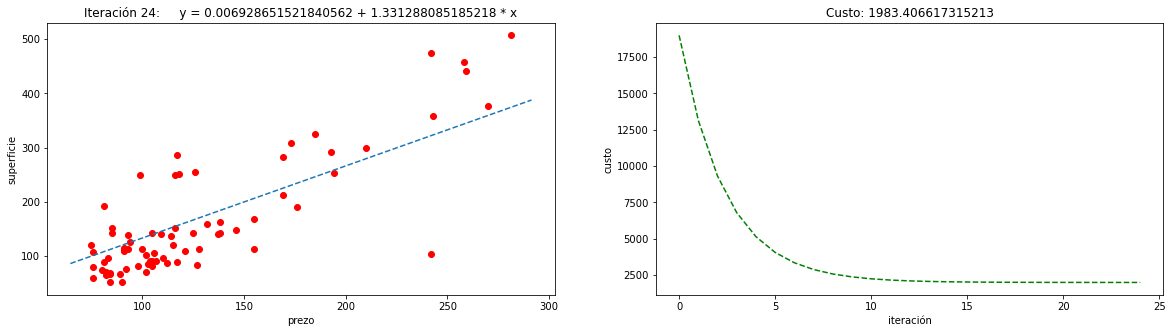

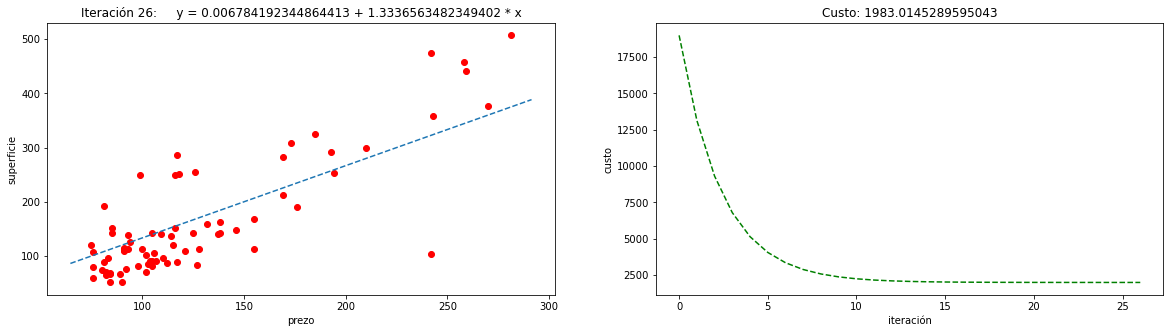

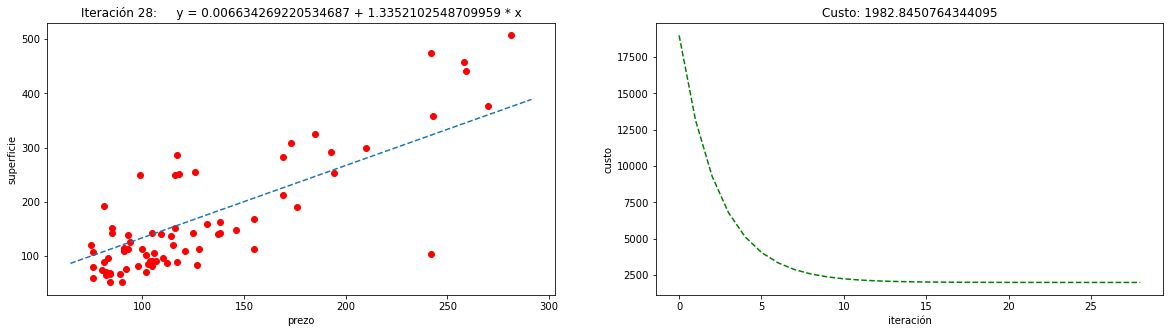

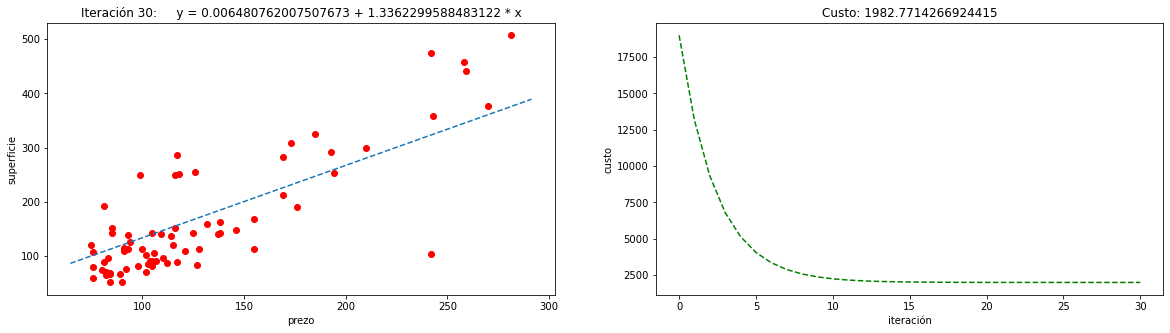

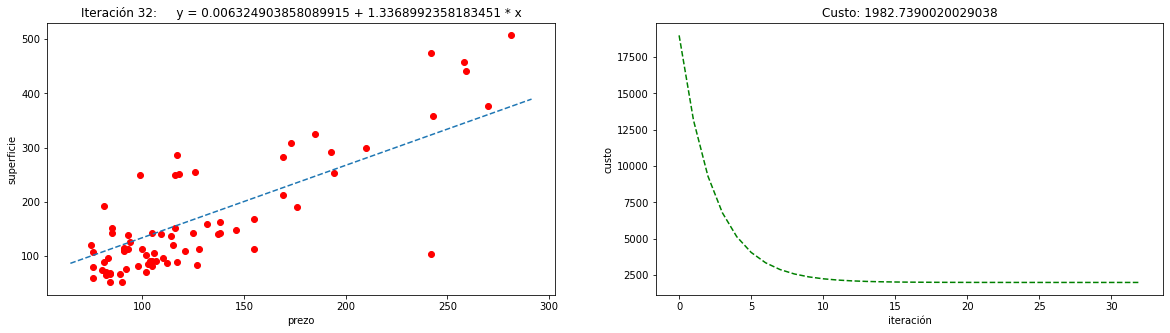

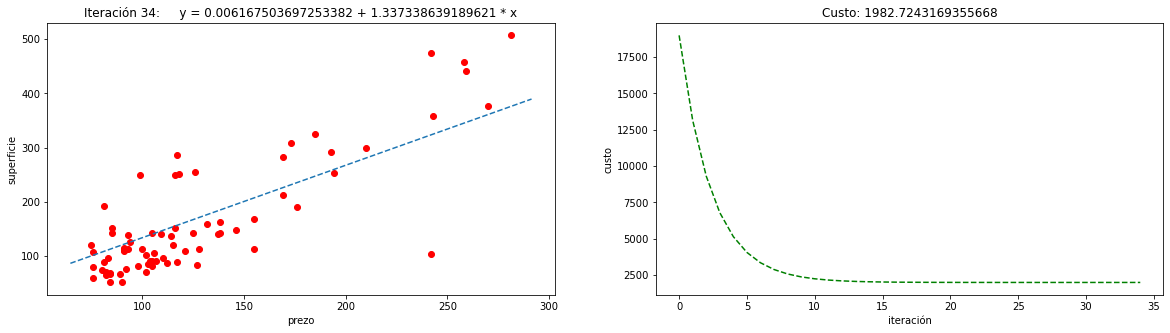

In [81]:
# Desactivamos a interactividade das figuras. Xa non nos interesa
%matplotlib inline

desc_grad(vivendas['superficie'], vivendas['prezo'], alpha = 0.00001, iteracions = 35)

> ❓ **_Pregunta 4._**  Explica brevemente e coas túas palabras como funciona o método de descenso do gradiente. Axúdate do problema das vivendas e das gráficas anteriores na túa explicación.

> ❓ **_Pregunta 5._**  Proba a executar o algoritmo variando o parámetro *alpha* ($\alpha$) e o número de iteracións (podes editar o script anterior ou crear outro na sección de respostas). Analiza os resultados. Cal é a función do parámetro $\alpha$? Que sucede con valores de $\alpha$ máis grandes (por exemplo, $\alpha = 0.01$)? Cantas iteracións dirías que son necesarias para obter unha regresión aceptable?

## Construción dun modelo con `LinearRegression`

A libraría `scikit-learn` facilítanos a construción de modelos con funcións xa programadas, de xeito que non é preciso que implementemos o descenso do gradiente a man. Imos repetir o proceso anterior empregando agora a clase `sklearn.linear_model.LinearRegression`. A súa invocación é moi simple:

In [82]:
from sklearn.linear_model import LinearRegression  # Importamos a clase (isto sólo é necesario facelo unha vez)
from sklearn.metrics import classification_report

# Dividimos o dataset en variables predictoras e dependentes
vivendas_X = vivendas.loc[:, :'superficie'].astype(float)
vivendas_Y = vivendas.loc[:, 'prezo']

model = LinearRegression()  # Definimos o modelo
model.fit(vivendas_X, vivendas_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *vivendas_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-55.577885
superficie,1.711149


> ❓ **_Pregunta 6._**  Explica moi brevemente a saída deste último script. 

## Avaliación do modelo

Ata agora vimos como construir un modelo de regresión lineal empregando todo o dataset. Sen embargo, se o facemos deste xeito non temos forma de obter unha medida realista de como vai render o modelo con datos novos. Porén, unha boa práctica é dividir o dataset en dous conxuntos, un de adestramento (*training*) e outro de test. Habitualmente resérvase arredor do 70% dos datos para adestramento e o 30% restante para test, aínda que isto son só referencias xerais. O modelo é construído empregando o conxunto de adestramento e posteriormente é avaliado sobre o conxunto de test.


En Python podemos crear os subconxuntos de adestramento e test coa axuda da función `train_test_split()` da libraría `scikit-learn`, para así tomar unha mostra aleatoria dos datos. Para obter todos os mesmos resultados definimos unha semente coa función `random.seed()` de `NumPy`. Deste xeito, non importa cantas veces executemos o script, `train_test_split` sempre fará a mesma selección.

In [83]:
from sklearn.model_selection import train_test_split
SEED_VALUE = 123  # NON CAMBIES ESTE SEED, así todos teremos os mesmos resultados

np.random.seed(SEED_VALUE)
vivendas_train, vivendas_test = train_test_split(vivendas, test_size=0.3, random_state=SEED_VALUE)

print('Tamaño train: {}'.format(vivendas_train.shape[0]))
print('Tamaño test: {}'.format(vivendas_test.shape[0]))

Tamaño train: 51
Tamaño test: 22


Construimos o modelo empregando só o conxunto de adestramento:

In [84]:
# Dividimos o dataset en variables predictoras e dependentes
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']

model = LinearRegression()  # Definimos o modelo
np.random.seed(SEED_VALUE)
model.fit(vivendas_train_X, vivendas_train_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *vivendas_train_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-34.426839
superficie,1.510870


Agora predicimos os valores das vivendas do conxunto de validación coa axuda da función `.predict()`:

In [85]:
# Dividimos o dataset en variables predictoras e dependentes
vivendas_test_X = vivendas_test.loc[:, :'superficie'].astype(float)
vivendas_test_Y = vivendas_test.loc[:, 'prezo']

np.random.seed(SEED_VALUE)
predicions = model.predict(vivendas_test_X)

A función anterior simplemente obtén os prezos das vivendas do conxunto de test a partires da función de regresión lineal que axusta o modelo. Observa que outra forma de facer esta predición é empregando a función $h_\theta(x)$ que definimos antes indicando os coeficientes $\theta_0$ e $\theta_1$ do noso modelo:

In [86]:
predicions2 = h(vivendas_test_X, th0=coef['Coefficients']['(Intercept)'], th1=coef['Coefficients']['superficie'])

As predicións dos conxuntos `predicions` e `predicions2` deberían coincidir:

In [87]:
print('Predicións obtidas coa función .predict():')
print(predicions)
print()
print('Predicións obtidas coa función h:')
print(predicions2.to_numpy()[:, 0])

Predicións obtidas coa función .predict():
[257.17108422 119.68190805 119.68190805 332.71458762 258.68195429
 165.00801008 127.23625839 331.20371755  80.39928628 140.834089
 121.19277811  92.48624682 282.85587538 124.21451825 142.34495906
 125.72538832 142.34495906 220.91020259 131.76886859 139.32321893
 356.8885087   86.44276655]

Predicións obtidas coa función h:
[257.17108422 119.68190805 119.68190805 332.71458762 258.68195429
 165.00801008 127.23625839 331.20371755  80.39928628 140.834089
 121.19277811  92.48624682 282.85587538 124.21451825 142.34495906
 125.72538832 142.34495906 220.91020259 131.76886859 139.32321893
 356.8885087   86.44276655]


Como dispomos das predicións dos prezos das vivendas do conxunto de test e tamén coñecemos os seus prezos reais, agora podemos avaliar o rendemento do noso modelo. Por exemplo, podemos empregar de novo o erro cadrático medio: 

In [88]:
e_cadratico = ecm(vivendas_test_Y, predicions)
print(e_cadratico)

1775.6429474014146


O problema do erro cadrático medio é que non resulta un indicador moi intuitivo. Sen embargo, podemos calcular a súa raíz cadrada para obter unha estimación do erro en miles de euros:

In [89]:
np.sqrt(e_cadratico)

42.13837855686209

Outra posibilidade é empregar o índice de correlación entre os datos reais e as predicións:

In [90]:
vivendas_test_Y.corr(pd.Series(predicions, vivendas_test_Y._index))

0.9160621867265676

Como vemos, o índice de correlación é practicamente 1, polo que podemos afirmar que ambos vectores están moi correlacionados positivamente. Isto é sinal de que estamos a realizar boas predicións.

> ❓ **_Pregunta 7._**  Por que non sería axeitado avaliar o rendemento do noso modelo empregando os mesmos datos cos que o adestramos?

## Identificación de valores atípicos (*outliers*)

Os valores atípicos, anómalos ou *outliers* son instancias do noso conxunto de datos que non seguen a tendencia habitual do dataset, sendo numéricamente distantes ao resto dos datos. Noutras palabras, son instancias que parecen inconsistentes co resto dos valores do dataset. Debemos evitar que o noso conxunto de adestramento presente estes datos atípicos xa que poden deteriorar moito a calidade dos nosos modelos. 

Imos ver un exemplo sinxelo de como identificar *outliers* e analizaremos o seu impacto na calidade do modelo do prezo das vivendas. Ten en conta que esta é unha etapa habitual no preprocesado dos datos. Nós excepcionalmente ímola abordar agora aínda, tras ter un modelo, con fins ilustrativos.

Os diagramas de caixa, ou *boxplots*, son gráficos baseados en cuartiles que nos permite visualizar a distribución do conxunto de datos para cada unha das variables. En Python podemos visualizalos coa función `boxplot()` de `matplotlib`:

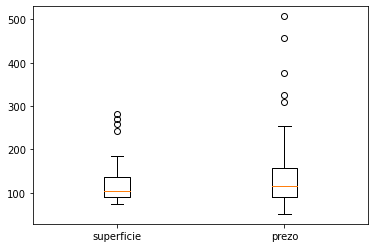

In [91]:
box = plt.boxplot(vivendas_train, labels=vivendas_train.columns)

Dentro da caixa atópase o 50% dos datos. Os datos máis atípicos (círculos) están fora dos brazos da caixa. Vemos que ambas variables presentan uns poucos *outliers* na súa distribución. Estes *outliers* coñécense como univariados porque están presentes na distribución dunha soa variable. Podemos saber os valores deses *outliers* do seguinte xeito:

In [92]:
out_superficie = box["fliers"][0].get_data()[1]
out_prezo = box["fliers"][1].get_data()[1]

print("Outliers na variable 'superficie': {}".format(out_superficie))
print("Outliers na variable 'prezo': {}".format(out_prezo))

Outliers na variable 'superficie': [258. 270. 242. 281.]
Outliers na variable 'prezo': [308.53 457.11 376.51 325.61 507.09]


Así coñecemos as superficies e prezos atípicas. Agora ben, que un exemplo sexa *outlier* nalgunha das dimensións non implica que sexa realmente un dato atípico no noso problema. Por exemplo, que unha vivenda teña unha superficie de 281 metros cadrados pode ser un valor atípico da dimensión Superficie se a maioría das vivendas son pequenas no dataset. Do mesmo modo, unha vivenda que custe preto de 500.000 euros pode ser atípica se o precio medio da vivenda é moito inferior. 

Os *outliers* dos que realmente nos temos que preocupar son aqueles *outliers* multivariados, é dicir, que disten da tendencia nas dúas dimensións, superficie-prezo. Existen métodos de identificación de outliers en máis dunha dimensión pero, debido á súa complexidade, quedan fora desta práctica. Posto que o noso problema conta con poucas instancias, podemos facer unha inspección visual e manual:

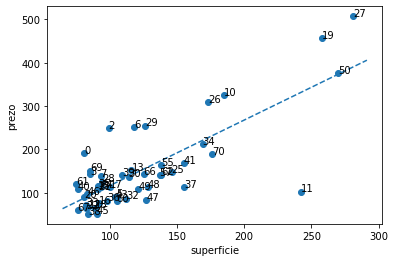

In [93]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Creamos e mostramos a recta
line_x_vals = np.array(ax.get_xlim())
line_y_vals = coef['Coefficients']['(Intercept)'] + coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--')

# Imprimimos os identificadores
for i in vivendas_train.index:
    ax.text(vivendas_train['superficie'][i], vivendas_train['prezo'][i], i)

plt.show()

Se nos fixamos no gráfico de dispersión, existe un valor moito máis distante da recta de regresión que o resto:

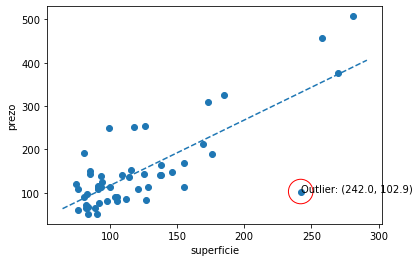

In [94]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Mostramos a recta
ax.plot(line_x_vals, line_y_vals, '--')

# Marcamos o outlier
outlier_id = 11
outlier = vivendas_train.loc[outlier_id]
ax.scatter(outlier['superficie'], outlier['prezo'], s=600, facecolors='none', edgecolors='r')
ax.text(outlier['superficie'], outlier['prezo'],
        'Outlier: ({}, {})'.format(outlier['superficie'], outlier['prezo']))
plt.show()

Imos ver se podemos mellorar a calidade do modelo prescindindo deste dato atípico. Eliminámolo do conxunto de adestramento e adestramos un novo modelo:

In [95]:
# Eliminamos o outlier do conxunto
vivendas_train = vivendas_train.drop(outlier_id)

# Dividimos o dataset en variables predictoras e dependentes
vivendas_train_X = vivendas_train.loc[:, :'superficie'].astype(float)
vivendas_train_Y = vivendas_train.loc[:, 'prezo']

new_model = LinearRegression()  # Definimos un novo modelo
new_model.fit(vivendas_train_X, vivendas_train_Y)  # Axustamos o novo modelo aos datos

# Resumo do modelo
new_coef = pd.DataFrame([new_model.intercept_, *new_model.coef_], ['(Intercept)', *vivendas_train_X.columns], columns=['Coefficients'])
new_coef

,Coefficients
(Intercept),-59.680167
superficie,1.759946


Graficamos para ver a diferenza entre o novo modelo sen o outlier e o vello:

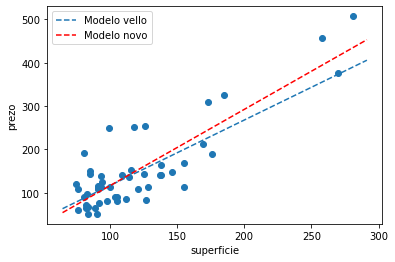

In [96]:
# Creamos o entorno
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)
plt.xlabel("superficie")  # Nombramos os eixos
plt.ylabel("prezo")

# Debuxamos o scatter
ax.scatter(vivendas_train['superficie'], vivendas_train['prezo'])

# Creamos e mostramos a recta antiga
line_x_vals = np.array(ax.get_xlim())
line_y_vals = coef['Coefficients']['(Intercept)'] + coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--', label='Modelo vello')

# Creamos e mostramos a recta nova
line_y_vals = new_coef['Coefficients']['(Intercept)'] + new_coef['Coefficients']['superficie'] * line_x_vals
ax.plot(line_x_vals, line_y_vals, '--', color='r', label='Modelo novo')

ax.legend()  # Facemos que se mostren as labels

plt.show()

Realizamos de novo a predición sobre o conxunto de test e avaliamos o rendemento:

In [97]:
novas_predicions = new_model.predict(vivendas_test_X)
e_cadratico_novo = ecm(vivendas_test_Y, novas_predicions)

print(np.sqrt(e_cadratico_novo))
vivendas_test_Y.corr(pd.Series(novas_predicions, vivendas_test_Y._index))

37.01214130291502


0.9160621867265678

> ❓ **_Pregunta 8._**  Analiza brevemente o impacto do *outlier* no modelo de regresión.

**************************************************************

# Respostas ao cuestionario (4 puntos)

**LEMBRA:** Non esquezas de escribir teu nome e apelidos na segunda celda do presente documento.

❓ **_Pregunta 1._  Indica o número de instancias e variables do dataset e o seu tipo. Investiga como acceder a valores de filas e columnas concretas dun obxecto dataframe e averigua cal foi o prezo de venda da vivenda na posición 50 do dataset. Indica o comando que empregaches para averigualo.**

El número de instancias es 73, una por fila. El número de variables por cada instancia es 2: la superficie en m^2 y el precio de la vivienda. 

``` python
vivendas['prezo'][50]
#El precio es 376.510,00€ 
```

❓ **_Pregunta 2._  Cal é o prezo medio de venda dos inmobles? Que indican e significan *25%.*, *50%.* e *75%.* na saída da función anterior? Baseándote nos valores anteriores, cal é a mediana de superficie e a de precio?**

EL precio medio de las viviendas es de 162.652,12€. El 25%, 50% y 75% corresponde a el primer, segundo y tercer quantil, es decir justo el precio del inmueble situado en la posición correspondinte al 25%, 50% y 75%. La mediana corresponder con el dato o la pareja de datos situada en el 50% de los datos. Por lo tanto, coincide con el segundo quantil.

❓ **_Pregunta 3._  Observa detidamente o gráfico anterior. Xa que se trata dun gráfico de dispersión, que poderías comentar sobre a dispersión dos datos? Dirías que existe algún tipo de relación entre as dúas variables? Xustifica a túa resposta.**

La dispersión aumenta cuanto más aumenta la superficie de la vivienda, teniendo datos muy concentrados con pequeñas superficies y datos más disperos cuando tenemos mayores superficies, excepto por valores atipicos.La relación entre las variables precio y superficie es que al aumentar una, directamente, aumenta la otra.


❓ **_Pregunta 4._  Explica brevemente e coas túas palabras como funciona o método de descenso do gradiente. Axúdate do problema das vivendas e das gráficas anteriores na túa explicación.**

El método del descenso rápido se utiliza para buscar mínimos locales en una función, para ello se utiliza el gradiente que se calcula con las derivadas parciales de la función. Así el gradiente siempre nos "apunta" hacia donde crece la función y por lo tanto utilizamos el menos gradiente para buscar hacia donde decrece la función y encontar mínimos locales.En nuestro caso queremos obtener el menor error en la predicción de la recta de regresión, para ello nuestro punto inicial a evaluar es el 0, variable theta. Además esta variable theta se vera afectada por el error que se calcula en y - predicion y por la variable *alpha* ($\alpha$) que se implementa en el calculo de theta con la finalidad de aumentar o reducir el ajuste de theta en cada iteracción.

NOTA: Con la superficie predecimos el precio, y lo comparamos con los precios reales(obtenidos en csv), en cada iteracción ajustamos nuestros tethas y nuestra función de coste(valores de error y - predicciones para todos los puntos).

❓ **_Pregunta 5._  Proba a executar o algoritmo variando o parámetro *alpha* ($\alpha$) e o número de iteracións (podes editar o script anterior ou crear outro na sección de respostas). Analiza os resultados. Cal é a función do parámetro $\alpha$? Que sucede con valores de $\alpha$ máis grandes (por exemplo, $\alpha = 0.01$)? Cantas iteracións dirías que son necesarias para obter unha regresión aceptable?**

Si *alpha* ($\alpha$) toma valores muy pequeños el ajuste es mínimo en cada iteracción y por lo tanto se necesitan de más iteracciones para obtener un valor correcto de theta y de la funcion de coste, esto además puede conllevar una complejidad computacional alta al necesitar de muchas iteracciones hasta poder converger en un mínimo. Por otro lado, si *alpha* ($\alpha$) toma valores muy grandes pueden provocarse ajustes muy grandes y por lo tanto producirse bucles sin conseguir converger en un mínimo. Como se ha comentado el número de iteracciones depende de alpha, cuanto menor sea más iteracciones serán necesarias.

❓ **_Pregunta 6._ Explica moi brevemente a saída deste último script.**

La salida consiste en una tabla con dos columnas, que nos devuelve los coeficientes de nuestras thetas. La primera fila corresponde a theta0(cuando la variable predictora es 0). La segunda corresponde theta1 que es el coeficiente en la función predictora de y.

> **`H(x) = -55.577885 + 1.711149 * x


❓ **_Pregunta 7._  Por que non sería axeitado avaliar o rendemento do noso modelo empregando os mesmos datos cos que o adestramos?**

Para evaular el modelo no se deben utilizar los datos con lo que ya lo has entrenado, porque puede tener una alta correlación y parecer un modelo muy bueno, pero al introducir datos nuevos el modelo no es bueno y empeora su correlación. Por eso existe el subconjunto de datos test.

❓ **_Pregunta 8._ Analiza brevemente o impacto do *outlier* no modelo de regresión.** 

El valor atípico que encontramos en el modelo de regresión perjudica al cálculo de un buen modelo ya que calculando el error cuadrátrico medio vemos que este es mayor que generando un nuevo modelo excluyendo ese oulier. Con el modelo inicial tenemos un error de 42 frente a 37 que obtenemos en el nuevo modelo exluyendolo. Esto tiene sentido porque la distancia/error entre la predicción y un valor atípico es la más alta del modelo.



**************************************************************

# Modelado dun problema de libre elección 

## Enunciado

O problema sobre o que acabamos de traballar é un "exemplo xoguete". Na realidade, resultaría difícil poder predicir con exactitude o prezo dunha vivenda tendo en conta só unha variable (neste caso, a superficie). O máis probable é que outros factores contribúan a estimar un bo prezo para os inmobles. Algúns exemplos de outras variables continuas que se poderían empregar son a súa antigüidade, a distancia ao centro urbán máis próximo, o custo da vida na cidade, rexión ou país onde se ubica, etc.

Pon en práctica os teus coñecementos de regresión lineal e intenta crear agora ti un modelo que se adapte a un problema cotiá. Elixe algún problema sinxelo, o que se che ocorra (con variables cuantitativas, por suposto). O único requerimento obrigatorio é **empregar exactamente DÚAS variables preditoras** no adestramento do modelo de regresión. Escolle como variables preditoras aquelas que penses que poden estar linealmente correlacionada coa variable que queres predicir. Aquí tes un par de exemplos para que che veña a inspiración: 

a) obter a nota media de cada un dos alumnos do GrEI ($y$) en base ás horas que adican a estudar semanalmente ($x_1$) e a súa idade ($x_2$). 
b) estimar o prezo dun cuarto ($y$) en función da distancia do hotel ao centro da cidade ($x_1$) e da nota media do mesmo en Booking.com ($x_2$).

Deberás recadar datos e construir un pequeno dataset, pero non invistas demasiado tempo nisto, basta con que dispoñas dun conxunto suficientemente representativo para levar a cabo a regresión. É dicir, **como mínimo debe ter 3 variables (2 predictoras + 1 obxectivo) e un número prudente de instancias, por exemplo 40**. Se non se che ocorre ningúnha idea boa... non pasa nada! Outra opción é que empregues algún dataset que atopes na web, hai moitos portais de onde podes sacar datos. Por exemplo Kaggle, a maior comunidade de ciencia de datos e aprendizaxe automática online. Aquí tes algunhas ligazóns que podes consultar:

- ["friendly" datasets en Kaggle](https://www.kaggle.com/rtatman/fun-beginner-friendly-datasets)
- [outros datasets faciliños pensados para regresión](https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html)

Sexa cal sexa a túa decisión, asegúrate de comprender ben o problema e a información que estás a manexar. Fai un breve estudo dos teus datos, incluíndo gráficas e comentarios propios. De ser preciso, aplica as etapas de preprocesado que consideres, pero coidado se descargas un dataset da web, porque quizáis che implique facer un preprocesado demasiado complexo, para o que non estás preparado aínda. Logo, obtén o modelo e avalía o seu rendemento. Non pasa nada se finalmente non hai unha boa correlación entre as variables preditoras e a variable obxectivo e o modelo realiza malas predicións. A finalidade deste exercicio é abordar un problema real e que realices un bo procedemento de análise de datos en base ao aprendido.

Explica o teu problema e obtén un modelo seguindo as boas prácticas que levamos visto. Na avaliación do exercicio terase en conta a complexidade do problema e da solución (análise, preprocesado, adestramento e test), así como a claridade nas explicacións e a boa estruturación do traballo realizado. Proporciona todo o código que consideres necesario empregando scripts como os do exercicio anterior. Ao entregar esta práctica deberás incluir tamén o arquivo cos datos do teu problema no formato que che resulte máis cómodo (.csv, .txt, etc.).

## Resposta (6 puntos)

## Carga de datos e comprensión dos mesmos

Vamos a estudiar la "dependencia" o la cantidad de pedidos(en miles) que se realizan en una tienda de fotocopias, con respecto a dos variables predictoras: número de páginas y tamaño de la impresión(en miles). Como base tenemos un datatest obtenido de la página web:https://people.sc.fsu.edu/~jburkardt/datasets/regression/regression.html. 

Con este datatest vamos a generar en primer lugar un modelo de regresión lineal con todo el conjunto de datos, para posteriormente dividir este conjunto en dos subconjunto de entrenamiento y de testeo. De esta manera podemos comparar el resultado de ambos modelos. Como estandar se suele utilizar el modelo con subconjuntos, teniendo un subconjunto de entrenamiento y otro de teste, que consiste en tomar el 70% de los datos para entrenamiento de la regresión lineal, intendando obtener el menor error posible, y tomar el otro 30% de los datos para testeo y comprobar si la regresión que hemos obtenido se puede aplicar al resto de datos de testo y por lo tanto si es una regresión correcta.

Por último buscaremos los outliers o puntos atípicos, son aquellos puntos que aumentan cuantitativamente el error obtenido. La mejor forma de encontrarlos y observarlos claremnete es a través del diagrama de cajas(boxplot).Una vez hayamos calculado los outliers debemos difrenciar si estos son realmento puntos atípicos en nuestro dataset, en nuestra caso tomaremos los puntos atípicos que sean atípicos en dos dimensiones,(dos variables). Posteriormente generaremos un último modelo generado por el conjunto de entrenamiento pero sin los outliers, que serán eliminados del conjunto.

In [98]:
import pandas as pd  # Importamos a librería (isto sólo é necesario facelo unha vez)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt  # Importamos a libraría (isto sólo é necesario facelo unha vez)
import numpy as np  # Importamos NumPy, para operacións matemáticas

n_pedidos = pd.read_csv('npedidos.csv',delimiter=',',header=0)

In [99]:
n_pedidos.head(n=n_pedidos.shape[0])

,tam_impresion,n_paginas,n_pedidos
0,2800,22,437
1,2670,14,204
2,2800,37,725
3,2784,15,279
4,2800,38,474
5,2620,172,1587
6,2620,249,2630
7,2470,84,798
8,2620,242,2509
9,2475,100,1192


<IPython.core.display.Javascript object>


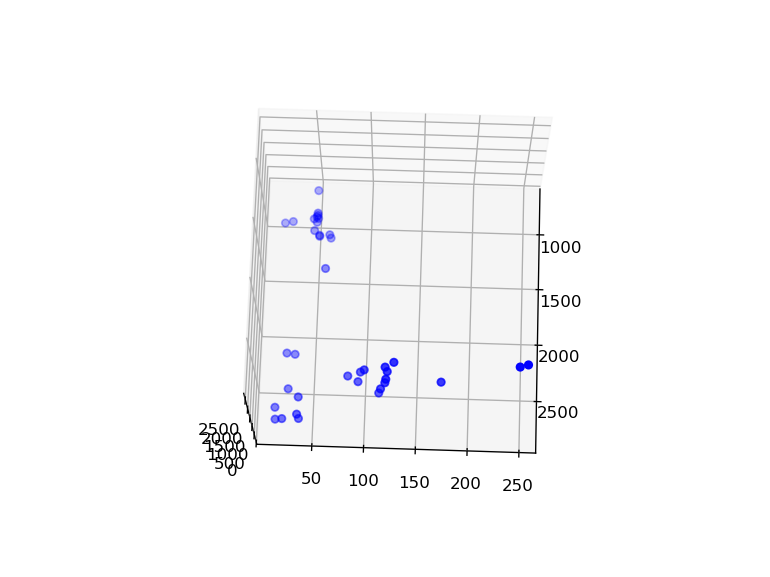

In [123]:
%matplotlib notebook
#Crear la figura
fig = plt.figure() 
#Crear el plano 3D
ax = fig.add_subplot(111,projection='3d') 
#Datos:
#x tamaño de impresion
#y número de páginas
#z numero de pedidos
x = n_pedidos["tam_impresion"]
y = n_pedidos["n_paginas"]
z= n_pedidos["n_pedidos"]
#Añadir al plano los datos
ax.scatter3D(x,y,z,c='b',marker='o')
plt.show()

In [101]:
%matplotlib inline

<AxesSubplot:xlabel='tam_impresion', ylabel='n_pedidos'>

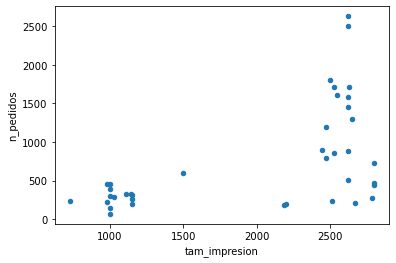

In [102]:
n_pedidos.plot(kind='scatter', x = 'tam_impresion', y = 'n_pedidos')

<AxesSubplot:xlabel='n_paginas', ylabel='n_pedidos'>

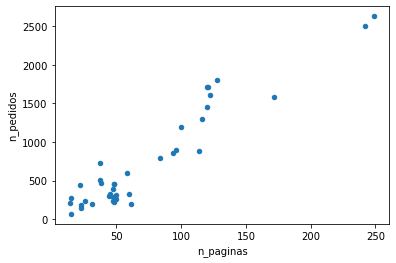

In [103]:
n_pedidos.plot(kind='scatter', x = 'n_paginas', y = 'n_pedidos')

In [104]:
n_pedidos.corr()

,tam_impresion,n_paginas,n_pedidos
tam_impresion,1.000000,0.403569,0.555822
n_paginas,0.403569,1.000000,0.946250
n_pedidos,0.555822,0.946250,1.000000


En los dos gráficos anteriores se puede observar que la variable `n_paginas` y `n_pedidos` tienen una correlación alta, esto implica que si uno crece el otro tambien tiende a crecer. Sin embargo, las variables `tam_impresion` y `n_pedidos` no tienen una gran correlación, ya que en valores pequeños hay una gran concrentación de los datos, pero al aumentar ambas variables los datos se dispersan de manera exagerada.

<IPython.core.display.Javascript object>


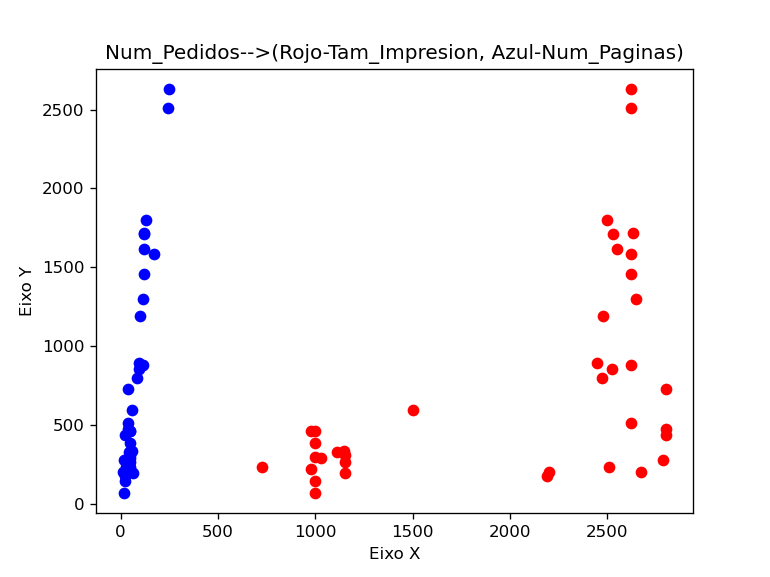

In [124]:
#Si queremos juntar ambos datos obtenidos, tenemos:

# Indicámoslle ao Notebook que queremos figuras interactivas
%matplotlib notebook

#Datos
x1 = n_pedidos["tam_impresion"]
x2 = n_pedidos["n_paginas"]
y = n_pedidos["n_pedidos"]

# Debuxamos os datos
fig = plt.figure()  # Creamos unha figura (contenedor para elementos a debuxar)
ax = fig.add_subplot(111, projection='rectilinear')  # Engadimos un Axes á figura (contén os elementos do debuxo)

ax.scatter(x1, y, color="red")  # Engadimos un scatterplot vermello
ax.scatter(x2, y, color="blue")  # Engadimos un scatterplot azul

ax.set_title("Num_Pedidos-->(Rojo-Tam_Impresion, Azul-Num_Paginas)")  # Poñemos un título

plt.xlabel("Eixo X")  # Nombramos os eixos
plt.ylabel("Eixo Y")

plt.show()  # Mostramos a figura por pantalla


In [106]:
%matplotlib inline

## Construción dun modelo con `LinearRegression`

In [107]:
### Función de regresión lineal h ###
def h(x,y, th0, th1, th2):
    return (th0 + x * th1 + y * th2)

In [108]:
from sklearn.linear_model import LinearRegression  # Importamos a clase (isto sólo é necesario facelo unha vez)
from sklearn.metrics import classification_report

# Dividimos o dataset en variables predictoras e dependentes
n_pedidos_X = pd.DataFrame(np.c_[n_pedidos['tam_impresion'], n_pedidos['n_paginas']], columns=['tam_impresion','n_paginas'])
n_pedidos_Y = n_pedidos['n_pedidos']

model = LinearRegression()  # Definimos o modelo
model.fit(n_pedidos_X, n_pedidos_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *n_pedidos_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-364.845519
tam_impresion,0.183301
n_paginas,10.263938


De esta manera tenemos una funcion de prediccion tal que:
> **`H(x,y)= -364.845519 + 0.183301 * x + 10.263938 * y`**

NOTA: Tambien se podría cualcular a bajo nivel utilizando el agoritmo de descenso rápido implementado anteriormente en la prática, pero se debe buscar un alpha y un número de iteracciones coherente, para así conseguir unos coeficientes/valores de theta correctos y bien ajustados.

## Avaliación do modelo

In [109]:
from sklearn.model_selection import train_test_split
SEED_VALUE = 123  # NON CAMBIES ESTE SEED, así todos teremos os mesmos resultados

np.random.seed(SEED_VALUE)
n_pedidos_train, n_pedidos_test = train_test_split(n_pedidos, test_size=0.3, random_state=SEED_VALUE)

print('Tamaño train: {}'.format(n_pedidos_train.shape[0]))
print('Tamaño test: {}'.format(n_pedidos_test.shape[0]))

Tamaño train: 26
Tamaño test: 12


In [110]:
# Dividimos o dataset en variables predictoras e dependentes
n_pedidos_train_X = pd.DataFrame(np.c_[n_pedidos_train['tam_impresion'], n_pedidos_train['n_paginas']], columns=['tam_impresion','n_paginas'])
n_pedidos_train_Y = n_pedidos_train['n_pedidos']

model = LinearRegression()  # Definimos o modelo
np.random.seed(SEED_VALUE)
model.fit(n_pedidos_train_X, n_pedidos_train_Y)  # Axustamos o modelo aos datos

# Resumo do modelo
coef = pd.DataFrame([model.intercept_, *model.coef_], ['(Intercept)', *n_pedidos_train_X.columns], columns=['Coefficients'])
coef

,Coefficients
(Intercept),-434.045826
tam_impresion,0.192126
n_paginas,11.541042


In [111]:
# Dividimos o dataset en variables predictoras e dependentes
n_pedidos_test_X = pd.DataFrame(np.c_[n_pedidos_test['tam_impresion'], n_pedidos_test['n_paginas']], columns=['tam_impresion','n_paginas'])
n_pedidos_test_Y = n_pedidos_test['n_pedidos']

np.random.seed(SEED_VALUE)

predicions = model.predict(n_pedidos_test_X)

predicions2 = h(n_pedidos_test_X['tam_impresion'],n_pedidos_test_X['n_paginas'] ,th0=coef['Coefficients']['(Intercept)'], th1=coef['Coefficients']['tam_impresion'],th2=coef['Coefficients']['n_paginas'])

print('Predicións obtidas coa función .predict():')
print(predicions)
print()
print('Predicións obtidas coa función h:')
print(predicions2.to_numpy())

Predicións obtidas coa función .predict():
[2943.04370902 1385.00301179 1144.21858625  348.25744193 2054.38345949
  496.34276226  298.94514524 1436.57367626 1413.4646232  1467.71156685
 2862.25641361  251.76975472]

Predicións obtidas coa función h:
[2943.04370902 1385.00301179 1144.21858625  348.25744193 2054.38345949
  496.34276226  298.94514524 1436.57367626 1413.4646232  1467.71156685
 2862.25641361  251.76975472]


In [112]:
e_cadratico = ecm(n_pedidos_test_Y, predicions)
print(e_cadratico)

38516.88622659761


In [113]:
np.sqrt(e_cadratico) #Estimación del error en miles de pedidos

196.25719407603282

In [114]:
n_pedidos_test_Y.corr(pd.Series(predicions, n_pedidos_test_Y._index))

0.9632938419787063

Podemos usar la correlación para ver como de buenas estan siendo las predicciones, vemos que esta muy cerca de 1 y que por lo tanto están muy correlacionados ambos vectores. Esto quiere decir que nuestras predicciones estan siendo correctas.

## Identificación de valores atípicos (*outliers*)

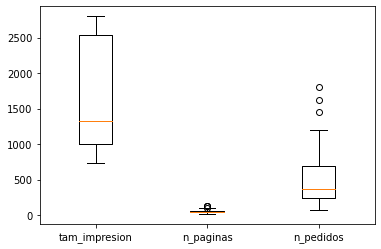

In [115]:
box = plt.boxplot(n_pedidos_train, labels=n_pedidos_train.columns)

In [116]:
out_tam_impresion = box["fliers"][0].get_data()[1]
out_n_paginas = box["fliers"][1].get_data()[1]
out_n_pedidos = box["fliers"][2].get_data()[1]


print("Outliers na variable 'tam_impresion': {}".format(out_tam_impresion))
print("Outliers na variable 'n_paginas': {}".format(out_n_paginas))
print("Outliers na variable 'n_pedidos': {}".format(out_n_pedidos))

outliers_id=[29,30,33]

Outliers na variable 'tam_impresion': []
Outliers na variable 'n_paginas': [128 122 120 100]
Outliers na variable 'n_pedidos': [1800 1615 1457]


### Outliers List:
**Solo tomamos aquellos valores atípicos que son outliers en dos dimensiones**

> Fila 31 n_paginas: 128 ; n_pedidos: 1800

> Fila 35 n_paginas: 122 ; n_pedidos: 1615

> Fila 32 n_paginas: 120 ; n_pedidos: 1457

**Al empezar en 0 y tener el header filas=filas-2**

> Fila 29 n_paginas: 128 ; n_pedidos: 1800

> Fila 33 n_paginas: 122 ; n_pedidos: 1615

> Fila 30 n_paginas: 120 ; n_pedidos: 1457


In [117]:
n_pedidos_train.head(n=n_pedidos_train.shape[0])

,tam_impresion,n_paginas,n_pedidos
23,2200,31,200
7,2470,84,798
29,2500,128,1800
37,1147,60,332
3,2784,15,279
20,1000,44,298
16,980,48,462
24,1000,48,461
4,2800,38,474
25,980,48,223


In [118]:
# Eliminamos o outlier do conxunto
n_pedidos_train = n_pedidos_train.drop(outliers_id)

# Dividimos o dataset en variables predictoras e dependentes
n_pedidos_train_X = pd.DataFrame(np.c_[n_pedidos_train['tam_impresion'], n_pedidos_train['n_paginas']], columns=['tam_impresion','n_paginas'])
n_pedidos_train_Y = n_pedidos_train['n_pedidos']

new_model = LinearRegression()  # Definimos un novo modelo
new_model.fit(n_pedidos_train_X, n_pedidos_train_Y)  # Axustamos o novo modelo aos datos

# Resumo do modelo
new_coef = pd.DataFrame([new_model.intercept_, *new_model.coef_], ['(Intercept)', *n_pedidos_train_X.columns], columns=['Coefficients'])
new_coef

,Coefficients
(Intercept),-274.312023
tam_impresion,0.166748
n_paginas,8.644360


In [119]:
novas_predicions = new_model.predict(n_pedidos_test_X)

In [120]:
e_cadratico_novo = ecm(n_pedidos_test_Y, novas_predicions)
print(e_cadratico_novo)

34245.99039175682


In [121]:
np.sqrt(e_cadratico_novo) #Estimación del error inferior a la calculada con los valores atípicos

185.05672209286757

**La estimación del error es inferior a la calculada anteriormente con los valores atípicos en el conjunto de entrenamiento, 185.05 frente a 196.25, reducimos el error y mejoramos nuestra predicción.**

Nota: Hay que recordar que a veces aunque mejoremos el error, el dataset tiene valores atípicos que no podemos eliminar puesto que son valores reales de nuestra muestra y no podemos eliminarlos así porque si. Debemos hacer un estudio y valorar si verdaderamente son valores atípicos y si podemos eliminarlos de nuestra predicción. Por ejemplo si el dueño de la tienda de fotocopias es mi amigo y le pido un única vez un número de páginas con un tamaño especial, este sería considerado un valor atípico que no se debería realmente tener en cuenta en una predicción ya que es un caso especial que no se va a volver a repetir y no tiene sentido que ese dato influya en la predicción del número de pedidos, con respecto a un tamaño de impresión y un número de páginas.

In [122]:
n_pedidos_test_Y.corr(pd.Series(novas_predicions, n_pedidos_test_Y._index))

0.9631364648057842

**En este caso tambien obtenemos una correlación positiva cercana a 1, lo que nos indica una buena correlación entre los datos predichos y el subconjunto de datos destinados al testeo. Esto nos indica una correcta predicción del con los datos del dataset utilizado**